In [1]:
!ls ~/evals/eval_5refs_MORETYPES

args.pickle
astera-dragonDT_5hps_3hds_2lin_64hc__ub3_ep60.pt.dragon-ryder
binary_paths.csv
debug_vars.csv
dragon_aligned.csv
dragon_predictions.csv
ryder_aligned.csv


In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

from pathlib import Path

from datatype_recovery.eval_dataset import PandasEvalMetrics

# df = pd.read_csv(Path.home()/'evals/eval_5refs_MORETYPES/astera-dragonDT_5hps_3hds_2lin_64hc__ub3_ep60.pt.dragon-ryder/predictions.csv')
# df = pd.read_csv(Path.home()/'evals/eval_5refs_MORETYPES/ryder_aligned.csv')
# df = pd.read_csv(Path.home()/'evals/test_eval_MORETYPES/ryder_aligned.csv')
df = pd.read_csv(Path.home()/'evals/astera_conf/dragon_aligned.csv')
df

,BinaryId,FunctionStart,Signature,Vartype,NameStrip,LocationStrip,Pred,PredJson,NumRefs,NumOtherVars,Influence,Confidence,NameDebug,LocationDebug,Type,TypeJson,TypeSeq,PredSeq
0,6,1089216,17,l,auStack_8,Stack[-0x8],void,"{""kind"": ""Builti...",1,3,1,0.041535,auStack_8,Stack[-0x8],uchar[8],"{""kind"": ""ArrayT...","ARR,uchar",void
1,6,1089449,"16,28,52,76,101,...",l,local_c,Stack[-0xc],int32,"{""kind"": ""Builti...",7,3,7,0.999967,i,Stack[-0xc],int32,"{""kind"": ""Builti...",int32,int32
2,6,1089449,42,p,param_2,LocType=register...,uint32*,"{""kind"": ""Pointe...",1,1,2,0.095840,a,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,uint32"
3,6,1089449,66,p,param_3,LocType=register...,uint32*,"{""kind"": ""Pointe...",1,1,2,0.095821,b,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,uint32"
4,6,1089449,90,p,param_1,LocType=register...,uint32*,"{""kind"": ""Pointe...",1,1,2,0.095816,r,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,uint32"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,6,1765287,"73,126,162,174,1...",l,local_5038,Stack[-0x5038],int64,"{""kind"": ""Builti...",10,8,10,0.903421,offset,Stack[-0x5038],int64,"{""kind"": ""Builti...",int64,int64
7174,6,1765816,"34,39,79,84",l,piVar1,LocType=register...,int32*,"{""kind"": ""Pointe...",4,0,4,0.999634,piVar2,LocType=register...,int32*,"{""kind"": ""Pointe...","PTR,int32","PTR,int32"
7175,6,1765816,"49,98,107,205,25...",p,param_1,LocType=register...,STRUCT*,"{""kind"": ""Pointe...",6,2,15,0.085031,js,LocType=register...,_GLFWjoystick*,"{""kind"": ""Pointe...","PTR,STRUCT","PTR,STRUCT"
7176,6,1765816,"69,74",l,sVar2,LocType=register...,int64,"{""kind"": ""Builti...",2,1,2,0.997098,sVar3,LocType=register...,int64,"{""kind"": ""Builti...",int64,int64


In [3]:
# df.apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')
PandasEvalMetrics(df, 'TypeSeq','PredSeq').accuracy

0.6774867651156311

In [4]:
PandasEvalMetrics(df[df.Confidence>0.9], 'TypeSeq','PredSeq').accuracy

0.9795501022494888

In [5]:
PandasEvalMetrics(df[df.Confidence<=0.9], 'TypeSeq','PredSeq').accuracy

0.564343163538874

In [6]:
len(df[df.Confidence>0.9])/len(df)*100

27.249930342713846

In [7]:
df.Influence.mean()

5.921426581220396

<Axes: xlabel='ConfidenceThreshold'>

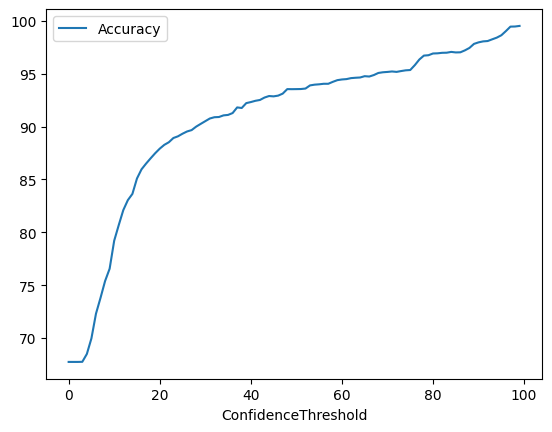

In [8]:
df_by_threshold = {pcnt: df[df.Confidence>(pcnt/100)] for pcnt in range(0, 100, 1)}

pd.DataFrame([(
        pcnt,
        len(ddf)/len(df)*100,
        ddf.Influence.mean(),
        PandasEvalMetrics(ddf, 'TypeSeq','PredSeq').accuracy*100
    ) for pcnt, ddf in df_by_threshold.items()],
    columns=['ConfidenceThreshold', 'VarsAboveThreshold', 'AvgInfluence', 'Accuracy']
).plot(x='ConfidenceThreshold', y='Accuracy', rot=0)

# thresh_df = pd.DataFrame(
#     [(
#         pcnt,
#         len(df[df.Confidence>(pcnt/100)])/len(df)*100,
#         df[df.Confidence>(pcnt/100)].Influence.mean(),
#         PandasEvalMetrics(df[df.Confidence>(pcnt/100)], 'TypeSeq','PredSeq').accuracy*100
#     ) ,
#     columns=['Confidence Threshold', 'VarsAboveThreshold', 'AvgInfluence', 'Accuracy']
# )
# thresh_df

<Axes: >

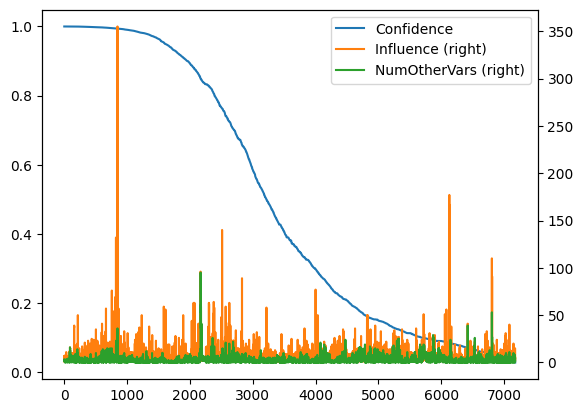

In [16]:
ax = df[['Confidence']].sort_values(by='Confidence',ascending=False).reset_index(drop=True).plot()
df[['Influence']].plot(ax=ax, secondary_y=True)
df[['NumOtherVars']].plot(ax=ax, secondary_y=True)

In [10]:
# df_by_threshold = {pcnt: df[df.Confidence>(pcnt/100)] for pcnt in range(0, 100, 1)}

df_by_inf_by_conf = {
    inf: {
        conf: df[(df.Confidence>=(3/100))&(df.Influence>=(inf/100))] for conf in range(50, 100, 10)
    }
    for inf in range(0, 100, 5)
}

# (inf_th, len(df[(df.Confidence>(conf_th/100))&(df.Influence>inf_th)])/len(df)*100)
pd.DataFrame([(
    i,
    *[len(gdf)/len(df)*100 for i, gdf in cdict.items()]
    ) for i, cdict in df_by_inf_by_conf.items()
    ],
    # columns=['Influence',]
    # columns=['Confidence','Influence','AboveThresholds','Accuracy']
)

# PandasEvalMetrics(gdf, 'TypeSeq','PredSeq').accuracy*100

#.pivot(columns=['Confidence'])
#.plot(x='Influence', y='AboveThresholds')

# for i, gdf in cdict.items()

,0,1,2,3,4,5
0,0,99.986069,99.986069,99.986069,99.986069,99.986069
1,5,99.986069,99.986069,99.986069,99.986069,99.986069
2,10,99.986069,99.986069,99.986069,99.986069,99.986069
3,15,99.986069,99.986069,99.986069,99.986069,99.986069
4,20,99.986069,99.986069,99.986069,99.986069,99.986069
5,25,99.986069,99.986069,99.986069,99.986069,99.986069
6,30,99.986069,99.986069,99.986069,99.986069,99.986069
7,35,99.986069,99.986069,99.986069,99.986069,99.986069
8,40,99.986069,99.986069,99.986069,99.986069,99.986069
9,45,99.986069,99.986069,99.986069,99.986069,99.986069


In [11]:
xdf = pd.DataFrame([(
            inf,
            conf,
            df.loc[(df.Confidence>(conf/100))&(df.Influence>inf),:]
        ) for inf in range(0,100,5)
        for conf in range(50,100,10)
    ],
    columns=['Influence','Confidence','DF']
)
xdf#.iloc[0].DF
xdf.groupby('Confidence').apply(lambda x: x.DF)#.apply(lambda x: x)
# xdf.groupby('Influence').apply(lambda x: [(x.Confidence, len(z)) for z in x.DF])
# xdf['AboveThresholds'] = xdf.DF.apply(lambda x: len(x)/len(df))

# xdf[xdf.Confidence==50].plot(x='Influence',y='AboveThresholds')
# xdf.groupby(['Confidence','Influence']).plot()#x='Influence',y='AboveThresholds')

Confidence    
50          0           BinaryId  ...
            5           BinaryId  ...
            10          BinaryId  ...
            15          BinaryId  ...
            20          BinaryId  ...
                         ...         
90          79          BinaryId  ...
            84          BinaryId  ...
            89          BinaryId  ...
            94          BinaryId  ...
            99          BinaryId  ...
Name: DF, Length: 100, dtype: object

,InfluenceThreshold,Conf50,Acc_Conf50,Conf60,Acc_Conf60,Conf70,Acc_Conf70,Conf80,Acc_Conf80,Conf90,Acc_Conf90
0,0,44.831429,93.536358,41.404291,94.448183,37.712455,95.160694,33.296183,96.903766,27.249930,97.955010
1,5,18.668153,96.119403,17.219281,97.411003,15.909724,98.161121,14.474784,98.556304,12.398997,98.988764
2,10,6.701031,95.841996,6.143773,96.598639,5.516857,97.222222,4.820284,97.976879,4.151574,97.986577
3,15,3.413207,95.510204,3.134578,96.000000,2.772360,96.482412,2.354416,97.633136,1.964335,97.872340
4,20,1.978267,95.070423,1.825021,95.419847,1.588186,95.614035,1.337420,96.875000,1.142379,97.560976
5,25,1.309557,94.680851,1.225968,94.318182,1.044859,94.666667,0.877682,95.238095,0.780162,96.428571
6,30,0.947339,94.117647,0.863750,93.548387,0.724436,92.307692,0.640847,93.478261,0.599053,95.348837
7,35,0.668710,93.750000,0.599053,93.023256,0.501532,91.666667,0.431875,93.548387,0.404012,93.103448
8,40,0.501532,94.444444,0.445807,93.750000,0.376149,92.592593,0.320424,95.652174,0.306492,95.454545
9,45,0.417944,96.666667,0.376149,96.296296,0.306492,95.454545,0.264698,100.000000,0.264698,100.000000


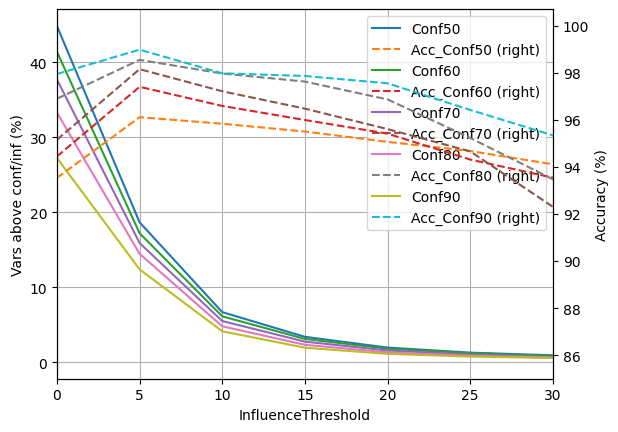

In [14]:
from matplotlib import pyplot as plt

conf_ranges = list(range(50, 100, 10))

by_conf = [pd.DataFrame([(
    inf_th,
    len(df[(df.Confidence>(conf_th/100))&(df.Influence>inf_th)])/len(df)*100,
    PandasEvalMetrics(df[(df.Confidence>(conf_th/100))&(df.Influence>inf_th)], 'TypeSeq','PredSeq').accuracy*100
    ) for inf_th in range(0, 100, 5)],
    columns=['InfluenceThreshold',f'Conf{conf_th}',f'Acc_Conf{conf_th}'])
for conf_th in conf_ranges]

mdf = pd.merge(by_conf[0], by_conf[1], on='InfluenceThreshold', how='left')

for x in by_conf[2:]:
    mdf = mdf.merge(x, on='InfluenceThreshold', how='left')

ax = None
for conf in conf_ranges:
    ax = mdf.plot(x='InfluenceThreshold', y=f'Conf{conf}',
            logx=False, ylabel='Vars above conf/inf (%)',
            xlim=(0, 30),
            grid=True,
            ax=ax)

    mdf.plot(x='InfluenceThreshold',
            y=f'Acc_Conf{conf}', ax=ax,
            style='--',
            #grid=True,
            ylabel='Accuracy (%)',
            secondary_y=True)

mdf

    #     columns=['InfluenceThreshold','HighConf/HighInf']
    # ).plot(x='InfluenceThreshold', fig=fig)

In [30]:
ax.get_lines()[-1].get_color()

'#bcbd22'

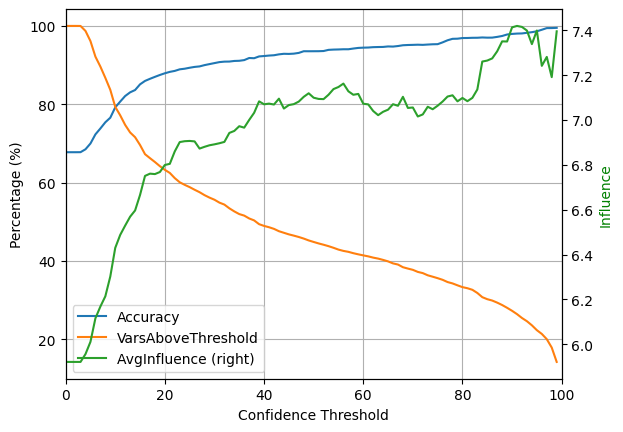

In [80]:

thresh_df = pd.DataFrame(
    [(
        pcnt,
        len(df[df.Confidence>(pcnt/100)])/len(df)*100,
        df[df.Confidence>(pcnt/100)].Influence.mean(),
        PandasEvalMetrics(df[df.Confidence>(pcnt/100)], 'TypeSeq','PredSeq').accuracy*100
    ) for pcnt in range(0, 100, 1)],
    columns=['Confidence Threshold', 'VarsAboveThreshold', 'AvgInfluence', 'Accuracy']
)
ax = thresh_df.plot(x='Confidence Threshold',y=['Accuracy','VarsAboveThreshold'], grid=True, ylabel='Percentage (%)')
ax2 = thresh_df.plot(ax=ax, x='Confidence Threshold', y='AvgInfluence', secondary_y=True, ylabel='Influence')
ax.set_xlim(0, 100)

ax2.yaxis.label.set_color('green')
ax.set

0.5

In [19]:
PandasEvalMetrics(df[df.Confidence<0.4], 'TypeSeq','PredSeq').accuracy

0.5128205128205128

(0.0, 5.0)

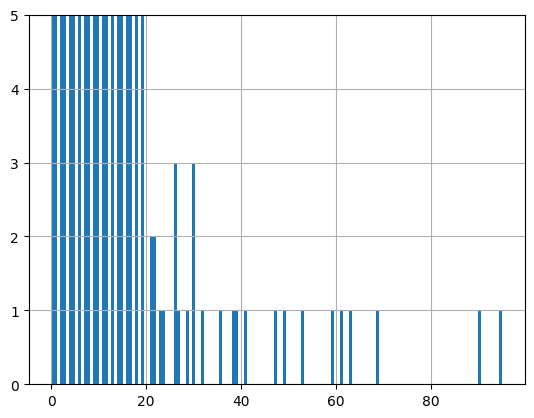

In [3]:
ax = df.NumOtherVars.hist(bins=150)
ax.set_ylim((0,5))
# dir(ax)

In [4]:
len(df[df.NumOtherVars<20])/len(df)

0.9961585951433667

<Axes: xlabel='NumOtherVars'>

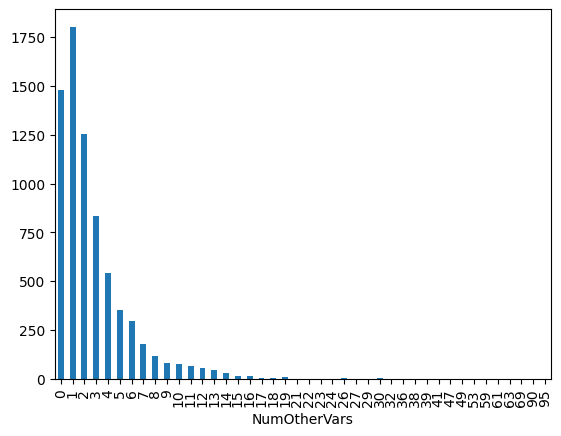

In [5]:
df.groupby('NumOtherVars').count()['BinaryId'].plot(kind='bar')

<Axes: xlabel='Influence'>

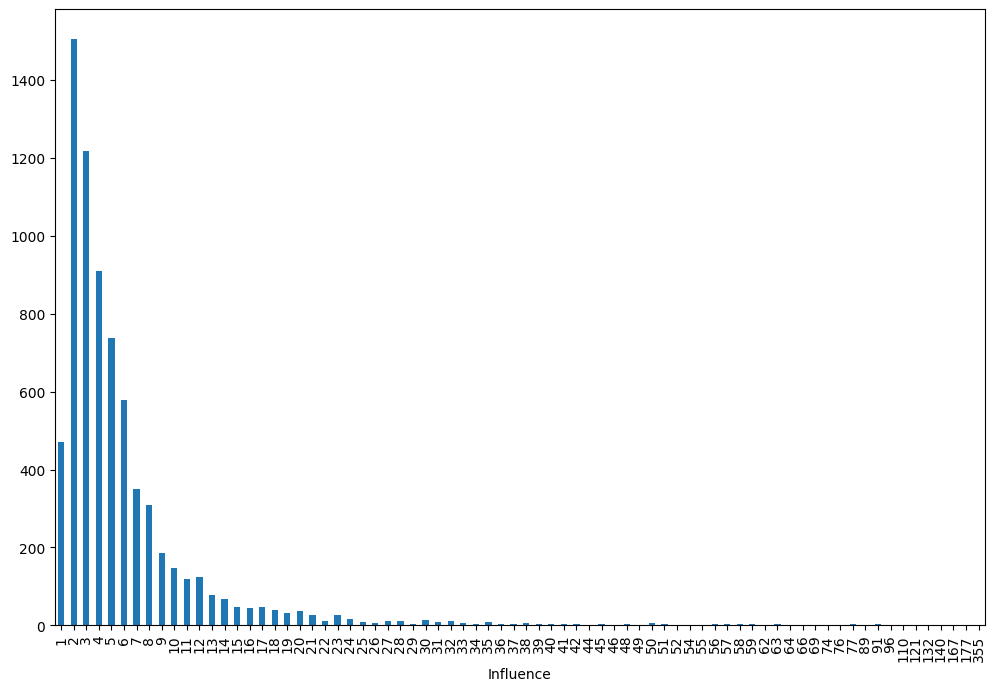

In [6]:
df.groupby('Influence').count()['BinaryId'].plot(kind='bar', figsize=(12,8))#, ylim=(0,5))

In [14]:
df['InfluenceN'] = df.Influence/df.Influence.max()
df['NumRefsN'] = df.NumRefs/df.NumRefs.max()
df['NumOtherVarsN'] = df.NumOtherVars/df.NumOtherVars.max()

<Axes: >

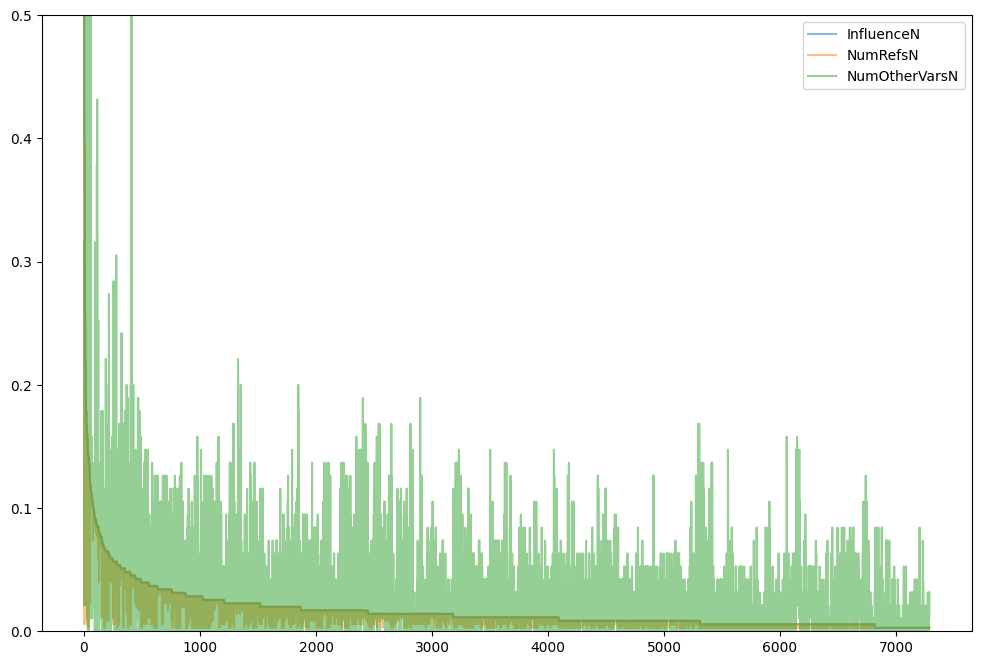

In [15]:
df[['InfluenceN','NumRefsN','NumOtherVarsN']].sort_values(by='InfluenceN', ascending=False).reset_index(drop=True).plot(
    figsize=(12,8), alpha=0.5, ylim=(0,0.5)
)
#.loc[:100,'Influence'].plot(kind='bar')
#.loc[:10,'Influence']#.plot(kind='bar')

<Axes: xlabel='NumOtherVars'>

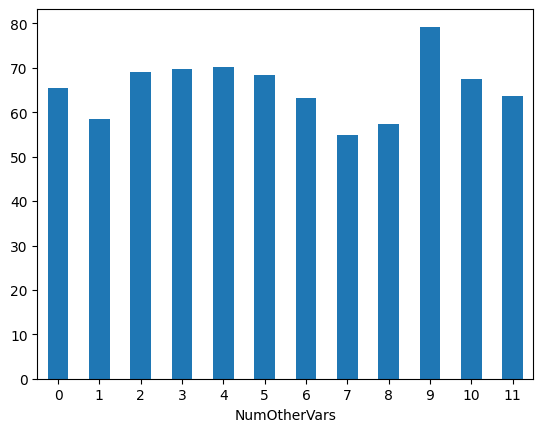

In [16]:
# df.groupby('Gen').apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')
df[df.NumOtherVars<12].groupby('NumOtherVars').apply(lambda df: PandasEvalMetrics(df,'TypeSeq','PredSeq').accuracy*100).plot(
    rot=0, kind='bar'
)

In [17]:
# df.columns
# TODO: - what is the accuracy of Gen1 vs. Gen2?????

df.groupby('Gen').pipe(lambda gb: [
    (PandasEvalMetrics(x[1], truth_col='TypeSeq', pred_col='PredSeq').accuracy, x[0]) for x in gb
])

[(0.7876354877559213, 1), (0.5817007086285952, 2)]

<Axes: xlabel='Gen', ylabel='Accuracy'>

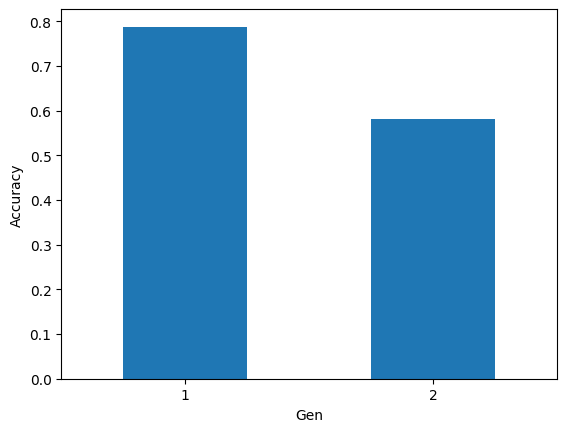

In [25]:
df.groupby('Gen').apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')

<Axes: xlabel='Gen', ylabel='# Variables'>

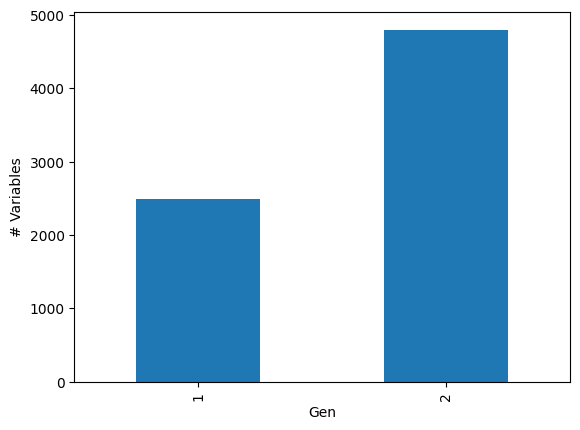

In [29]:
df.groupby('Gen').count()['BinaryId'].plot(kind='bar',ylabel='# Variables')

In [41]:
df.groupby('Gen').apply(lambda df: (df.Retyped.sum(), df.Retyped.sum()/len(df)*100))

Gen
1    (2465, 98.956242...
2    (4673, 97.394747...
dtype: object